In [148]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras import layers, losses
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from enum import Enum
import PIL
import PIL.Image
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping 
from PIL import Image
import random

In [149]:
cnn = Sequential()
cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(50, 100, 1)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(50 * 100, activation='sigmoid'))
cnn.add(Reshape((50, 100)))

In [150]:
class AutoencoderWithDense(Model):
    def __init__(self, latent_dim, dropout_rate=0.2):
        super(AutoencoderWithDense, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(1024, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(512, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(latent_dim, activation='relu'),
            ])
        self.decoder = tf.keras.Sequential([

            layers.Dense(512, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(1024, activation="relu"), # Added Dense
            layers.Dropout(dropout_rate), 
            layers.Dense(50 * 100, activation='sigmoid'),
            layers.Reshape((50, 100)) # is reversed from other functions
            # layers.Reshape((100, 200)) # is reversed from other functions
            ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [151]:
autoencoder_with_dense = AutoencoderWithDense(latent_dim = 250)
autoencoder_with_dense.build(input_shape=(None, 50, 100, 1))

In [152]:
cnn.load_weights('/Users/dominicmazza/Desktop/TomJerryDoodles-main/src/SavedModels/CNN.keras')
autoencoder_with_dense.load_weights('/Users/dominicmazza/Desktop/TomJerryDoodles-main/src/SavedModels/DenseModel.keras')

In [153]:
def loadImage(input_file_path, output_file_path, image_shape=(400, 200), isRGB = True): 
    input_image = Image.open(input_file_path).resize(image_shape)
    beforeGrayScale = np.array(input_image)
   
    if not isRGB: 
        input_image = input_image.convert("L")

    return np.array(input_image)/118.0



In [154]:
target_height = 100
target_width = 50

resized_images = []
labels = []

# Loop for Tom images
for filename in filenames_tom:
    inputImagePathTom = f"{inputImageBasepathTom}{filename}"
    loaded_values = loadImage(inputImagePathTom, personal_image_shape, isRGB=False)
    inputImageTom = loaded_values[0]

    # resize using OpenCV
    resized_image_tom = cv2.resize(inputImageTom, (target_width, target_height))
    resized_image_tom_with_channel = np.expand_dims(resized_image_tom, axis=-1) 

    resized_images.append(resized_image_tom_with_channel)
    labels.append(0)  

# Loop for Jerry images
for filename in filenames_jerry:
    inputImagePathJerry = f"{inputImageBasepathJerry}{filename}"
    loaded_values_jerry = loadImage(inputImagePathJerry, personal_image_shape, isRGB=False)
    inputImageJerry = loaded_values_jerry[0]

    resized_image_jerry = cv2.resize(inputImageJerry, (target_width, target_height))
    resized_image_jerry_with_channel = np.expand_dims(resized_image_jerry, axis=-1) 

    resized_images.append(resized_image_jerry_with_channel)
    labels.append(1)  
resized_images_array = np.array(resized_images)
labels_array = np.array(labels)

resized_images_array_cnn = np.reshape(resized_images_array, (-1, target_width, target_height, 1))

cnn_model_output = cnn.predict(resized_images_array_cnn)



1/1 [==============================] - 0s 63ms/step


In [155]:
#print("Input Images Shape:", inputImagesArray.shape)

# Inside the loops
print("Original Image Shape:", inputImageTom.shape)
print("Resized Image Shape:", resized_image_tom.shape)



Original Image Shape: (400,)
Resized Image Shape: (100, 50)


In [156]:
resized_images_array_cnn = np.squeeze(resized_images_array_cnn, axis=-1)

cnn_model_output = cnn.predict(resized_images_array_cnn)


2023-12-01 16:30:25.150936: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_fused_impl.h:761 : INVALID_ARGUMENT: convolution input must be 4-dimensional: [8,50,100]


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_13/conv2d_9/Relu' defined at (most recent call last):
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/kq/bw3hbxr13db7l4xz_02mhwgr0000gn/T/ipykernel_50810/1959373355.py", line 3, in <module>
      cnn_model_output = cnn.predict(resized_images_array_cnn)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 2283, in predict_step
      return self(x, training=False)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/Users/dominicmazza/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_13/conv2d_9/Relu'
convolution input must be 4-dimensional: [8,50,100]
	 [[{{node sequential_13/conv2d_9/Relu}}]] [Op:__inference_predict_function_7413]

In [ ]:
def display_images(edge_filtered, cnn_output, dense_output, ground_truth):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(edge_filtered, cmap='gray') 
    plt.title('Edge Filtered')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cnn_output, cmap='gray')  
    plt.title('CNN Output')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(dense_output, cmap='gray') 
    plt.title('Dense Model Output')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(ground_truth, cmap='gray')  
    plt.title('Ground Truth')
    plt.axis('off')

    plt.show()


1/1 [==============================] - 0s 14ms/step


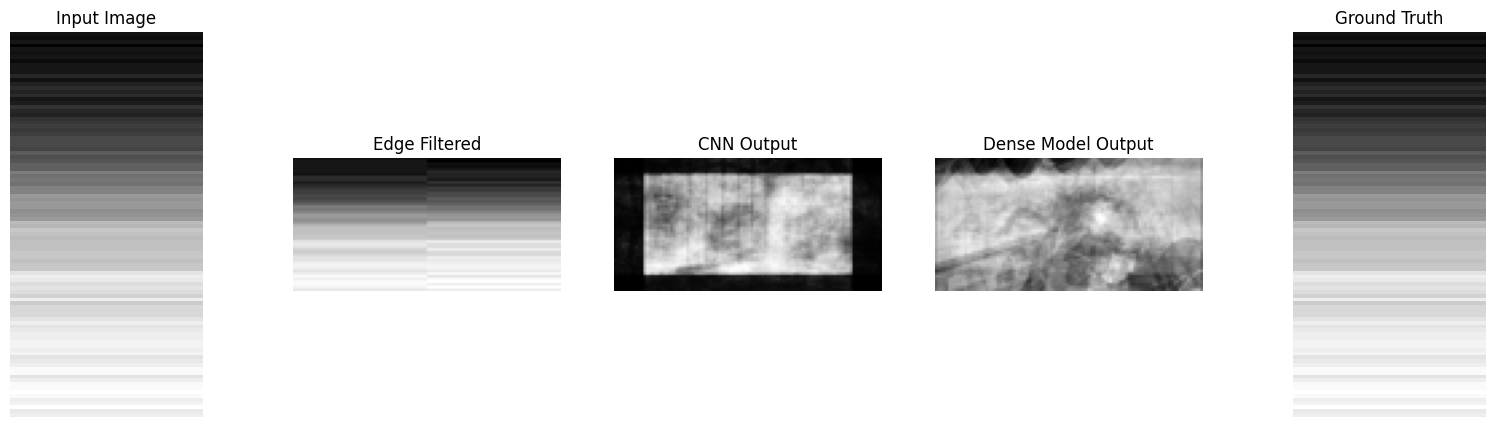

1/1 [==============================] - 0s 14ms/step


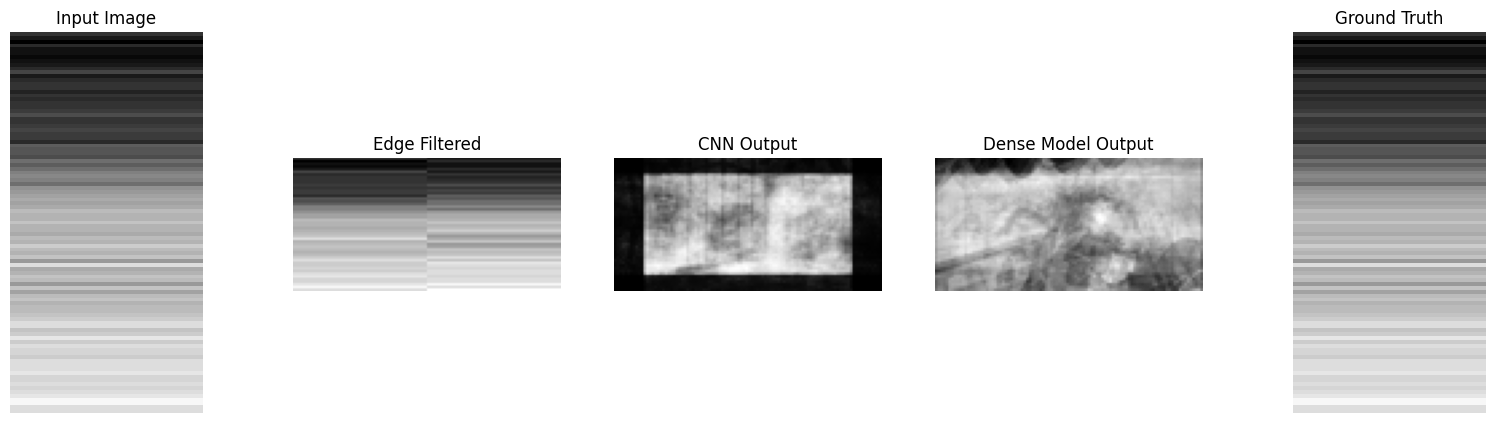

1/1 [==============================] - 0s 14ms/step


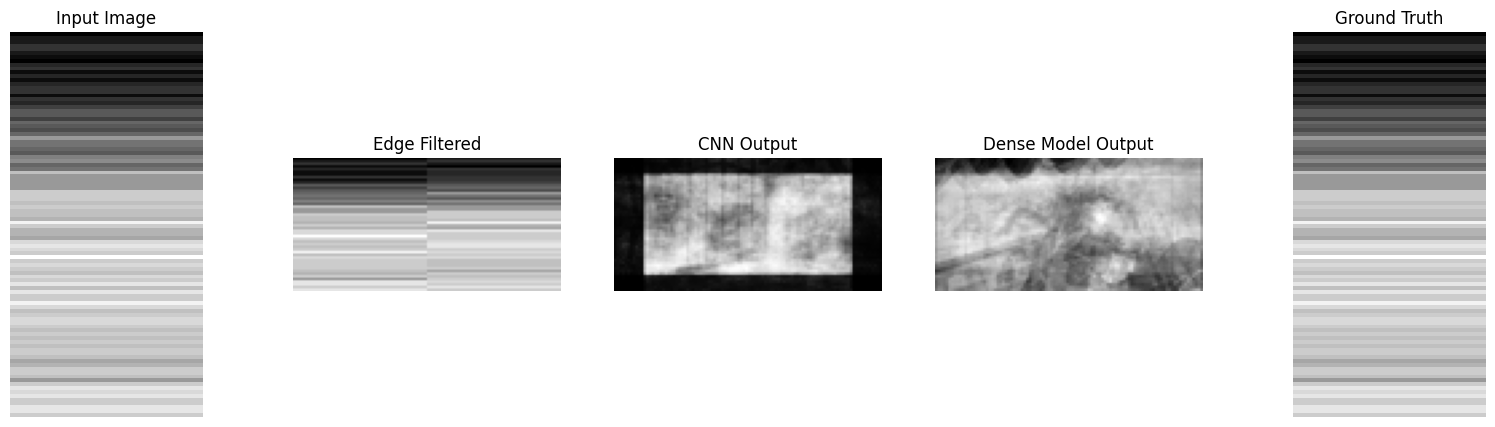

1/1 [==============================] - 0s 14ms/step


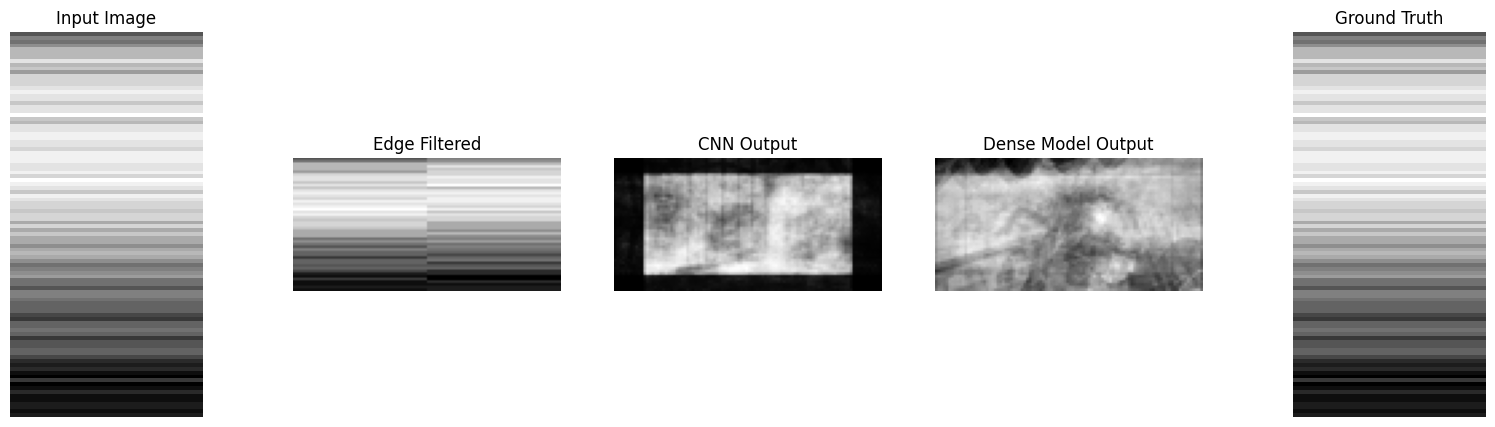

1/1 [==============================] - 0s 14ms/step


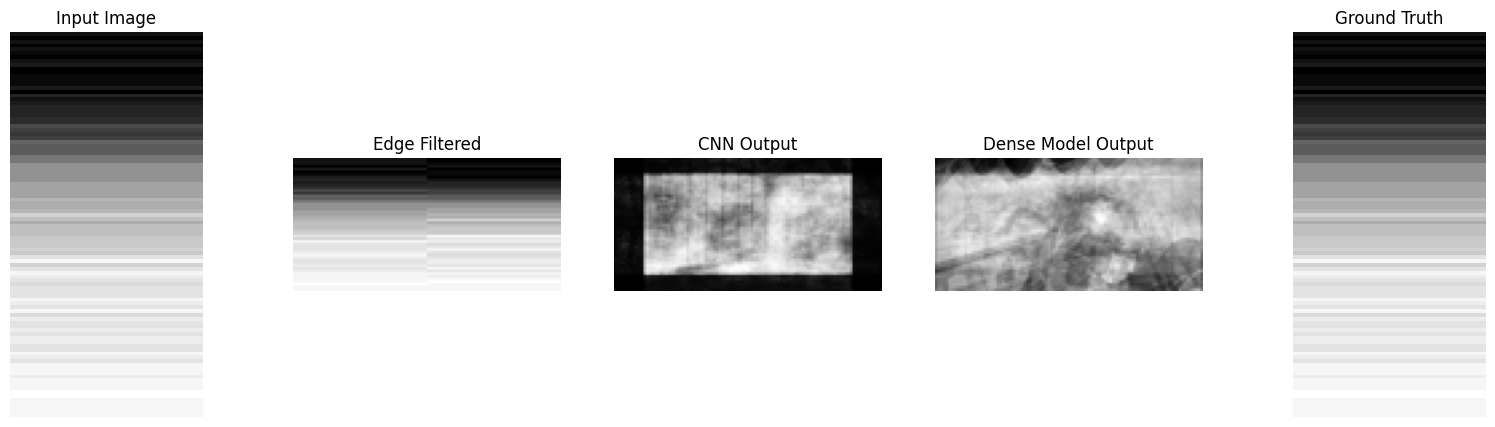

1/1 [==============================] - 0s 14ms/step


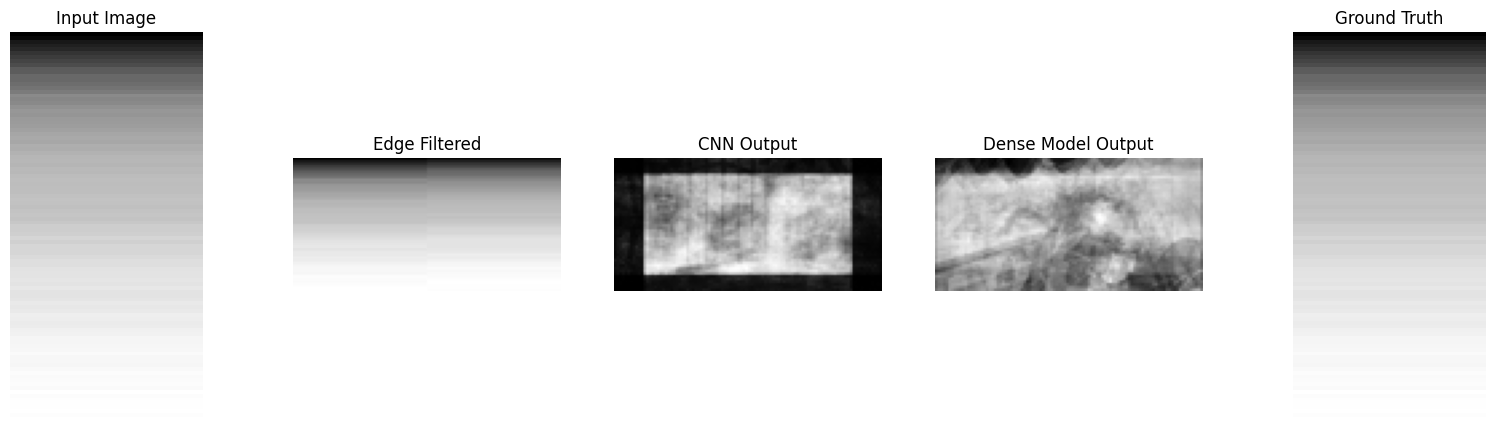

1/1 [==============================] - 0s 14ms/step


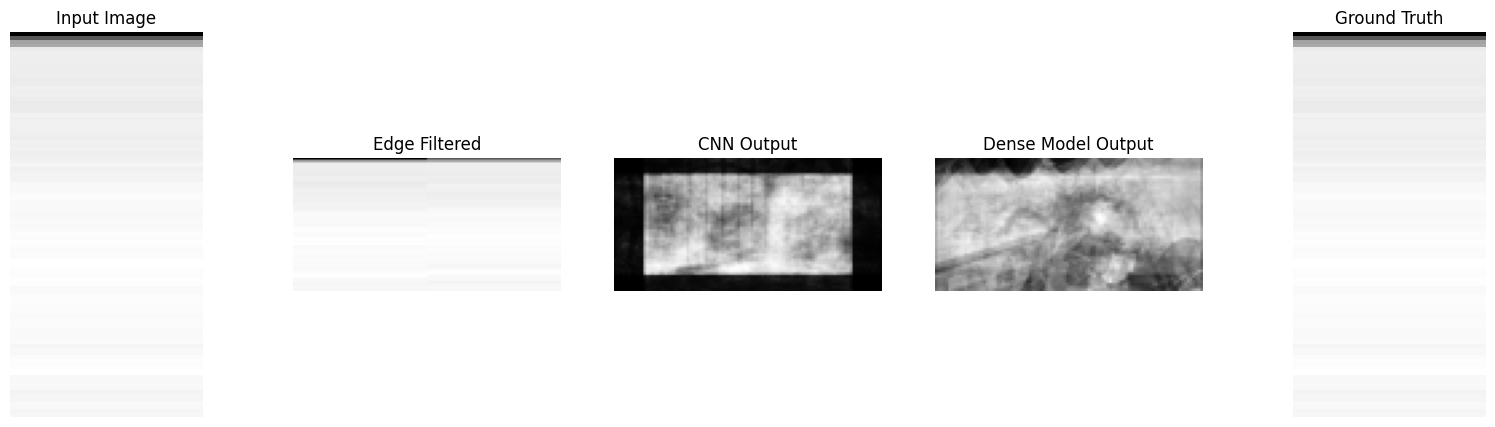

1/1 [==============================] - 0s 14ms/step


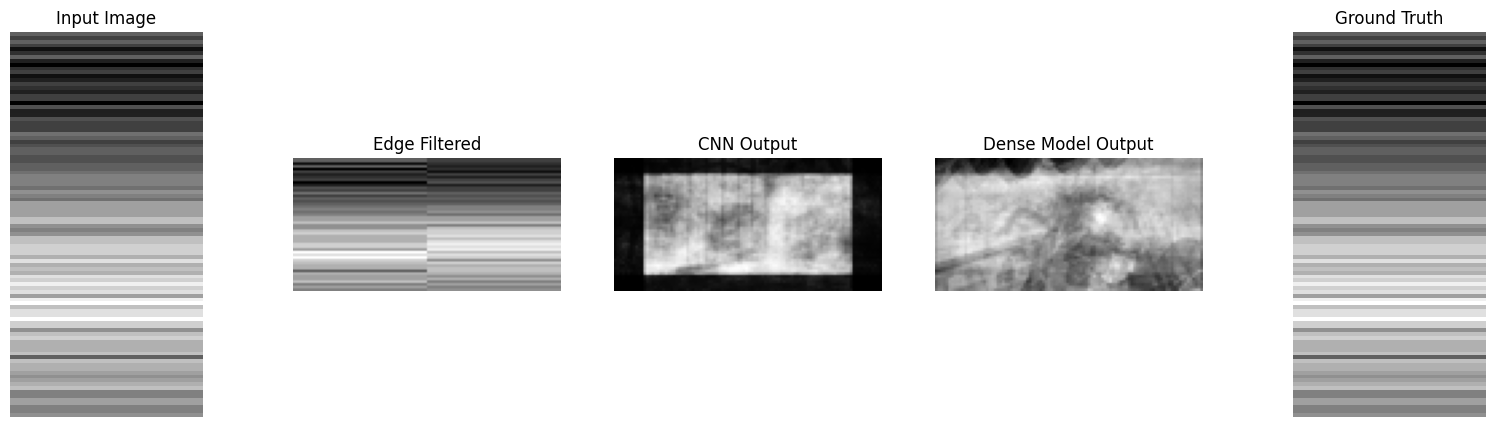

In [ ]:
for i in range(len(resized_images_array_cnn)):
    dense_model_output = autoencoder_with_dense.predict(resized_images_array_cnn[i:i+1])
    display_images(resized_images_array[i], resized_images_array_cnn[i], cnn_model_output[i], dense_model_output[0], resized_images_array[i])
